# North Atlantic sensitivities computed with ECCOv4

This notebook can be found in the GitHub repository https://github.com/NoraLoose/pyECCO

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

## Accumulated (5-year mean) sensitivities

In [2]:
ds = xr.open_dataset('datasets/NA_sens5yr_latlon.nc')

### Heat transport across OSNAP-East

Let's first look at the sensitivities of heat transport across the OSNAP-East section ($\text{MHT}_{OSNAP-E}$) to zonal & meridional wind stress. The OSNAP-East section is defined as a grid line path that approximates the shortest line (a great circle) between (43$^\circ$W ,60$^\circ$N) and (5$^\circ$W ,58$^\circ$N).

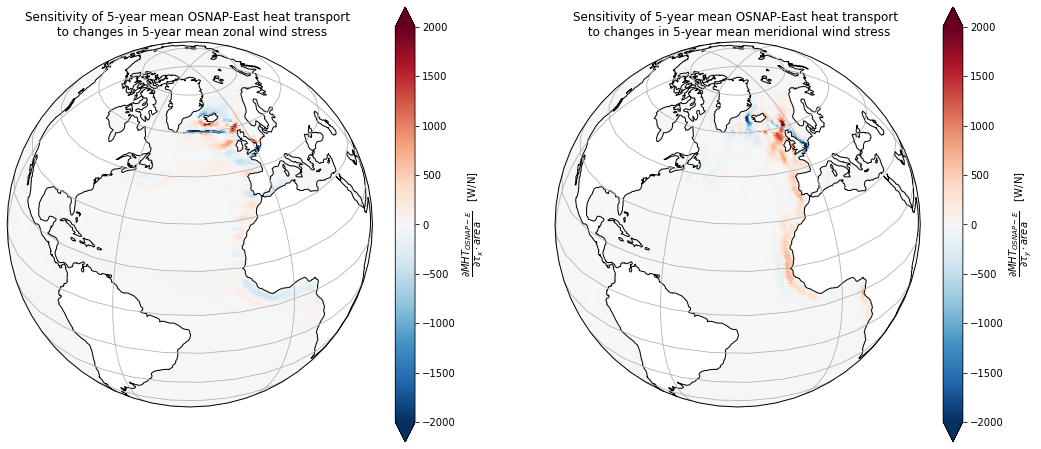

In [3]:
qoi = 'OSNAP-East heat transport'
vmax = 2000

fig,axs = plt.subplots(1,2,figsize=(18,8),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

ds.heatOSNAPe_adxx_taux.plot(ax=axs[0], vmin=-vmax, vmax=vmax, cmap='RdBu_r',transform=ccrs.PlateCarree(),
                             cbar_kwargs={"label": r'$\dfrac{\partial MHT_{OSNAP-E}}{\partial \tau_x \cdot area}\quad$'
                                       + '[' + ds['heatOSNAPe_adxx_taux'].units + ']'}
                            )
ds.heatOSNAPe_adxx_tauy.plot(ax=axs[1], vmin=-vmax, vmax=vmax, cmap='RdBu_r',transform=ccrs.PlateCarree(),
                            cbar_kwargs={"label": r'$\dfrac{\partial MHT_{OSNAP-E}}{\partial \tau_y \cdot area}\quad$'
                                       + '[' + ds['heatOSNAPe_adxx_tauy'].units + ']'}
                            )
for ax in axs:
    ax.coastlines()
    ax.gridlines()

axs[0].set_title('Sensitivity of 5-year mean %s \n to changes in 5-year mean zonal wind stress' %qoi);
axs[1].set_title('Sensitivity of 5-year mean %s \n to changes in 5-year mean meridional wind stress' %qoi);

An example of how to read the sensitivity maps:
The sensitivity to zonal wind stress (left figure) shows a zonally uniform band of negative sensitivity extending along the OSNAP-East section (from the southern tip of Greenland to the Scottish Shelf) at ~60$^\circ$N, with a maximum amplitude of approximately 2000 W/N. An increase in the 5-year mean westerly wind stress by $0.1 N/m^2$ across 1$^\circ$ of latitude (112 km) and along the full width of the section (2200 km) would lead to a decrease of the 5-year mean heat transport across the OSNAP-East section by approximately 
$
    2000*0.1*112*10^3*2200*10^3 \; W/N*N/m^2*m*m = 0.05PW,
$
by perturbing the Ekman transport across the section. 

### Irminger Sea subsurface temperature & heat transport across the ISR (the QoIs from Loose et al., 2020)

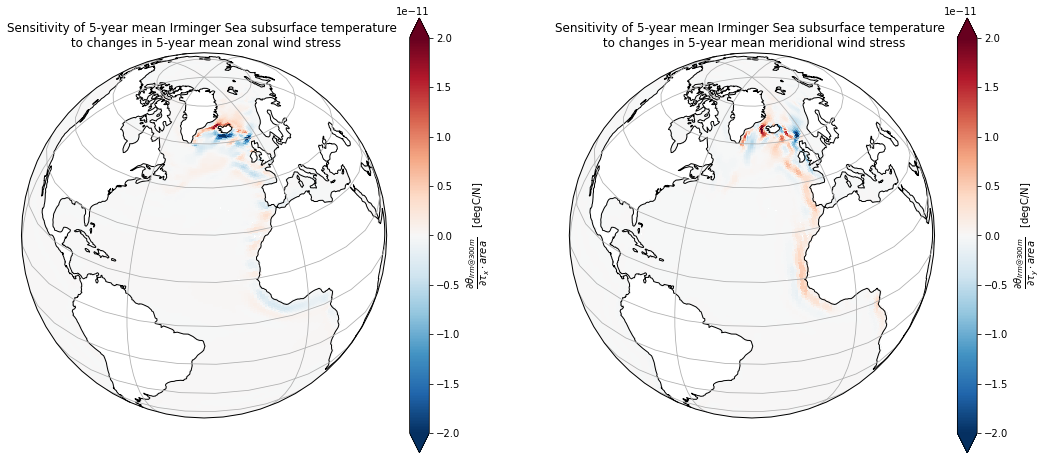

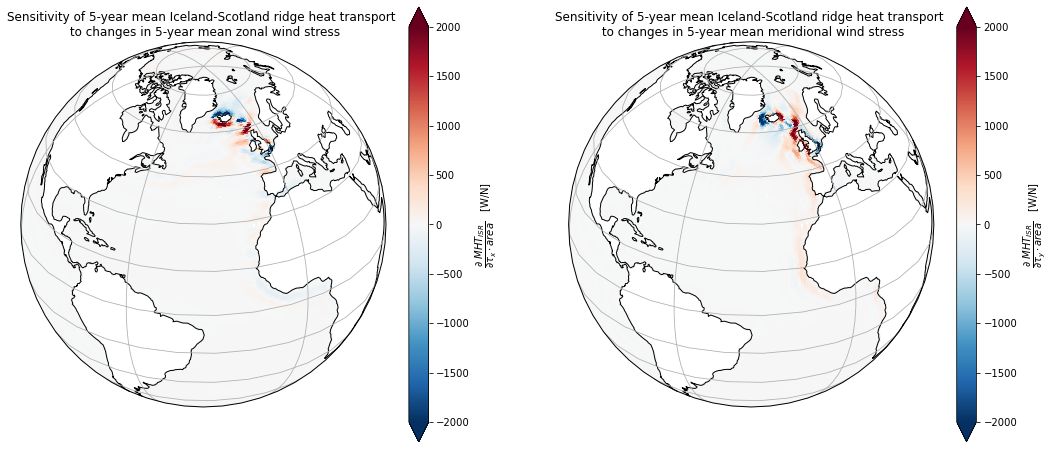

In [4]:
exp_list = ['thetaIrm300m','heatISR']
qoi_list = ['Irminger Sea subsurface temperature','Iceland-Scotland ridge heat transport']
qoi_label_list = ['theta_{Irm@300m}',' MHT_{ISR}']
vmax_list = [2e-11,2000]

for exp, qoi, qoi_label, vmax in zip(exp_list, qoi_list, qoi_label_list,vmax_list):

    fig,axs = plt.subplots(1,2,figsize=(18,8),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})

    ds[exp + '_adxx_taux'].plot(ax=axs[0], vmin=-vmax, vmax=vmax, cmap='RdBu_r',transform=ccrs.PlateCarree(),
                             cbar_kwargs={"label": r'$\dfrac{\partial \%s}{\partial \tau_x \cdot area}\quad$'% qoi_label 
                                       + '[' + ds[exp + '_adxx_taux'].units + ']'}
                            )
    ds[exp + '_adxx_tauy'].plot(ax=axs[1], vmin=-vmax, vmax=vmax, cmap='RdBu_r',transform=ccrs.PlateCarree(),
                            cbar_kwargs={"label": r'$\dfrac{\partial \%s}{\partial \tau_y \cdot area}\quad$'% qoi_label 
                                       + '[' + ds[exp + '_adxx_tauy'].units + ']'}
                            )

    for ax in axs:
        ax.coastlines()
        ax.gridlines()

    axs[0].set_title('Sensitivity of 5-year mean %s \n to changes in 5-year mean zonal wind stress' %qoi);
    axs[1].set_title('Sensitivity of 5-year mean %s \n to changes in 5-year mean meridional wind stress' %qoi);
    

Panel 2,3,4 are Figure 4d, 3c, 3d in Loose et al., 2020; except that in Loose et al. the sensitivities are normalized by a spatially constant factor (the total sensitivity), thus unitless.

## Next: Monthly mean sensitivities

In [5]:
ds2 = xr.open_dataset('datasets/NA_sensMonthly_latlon.nc')

### Heat transport across OSNAP-East 

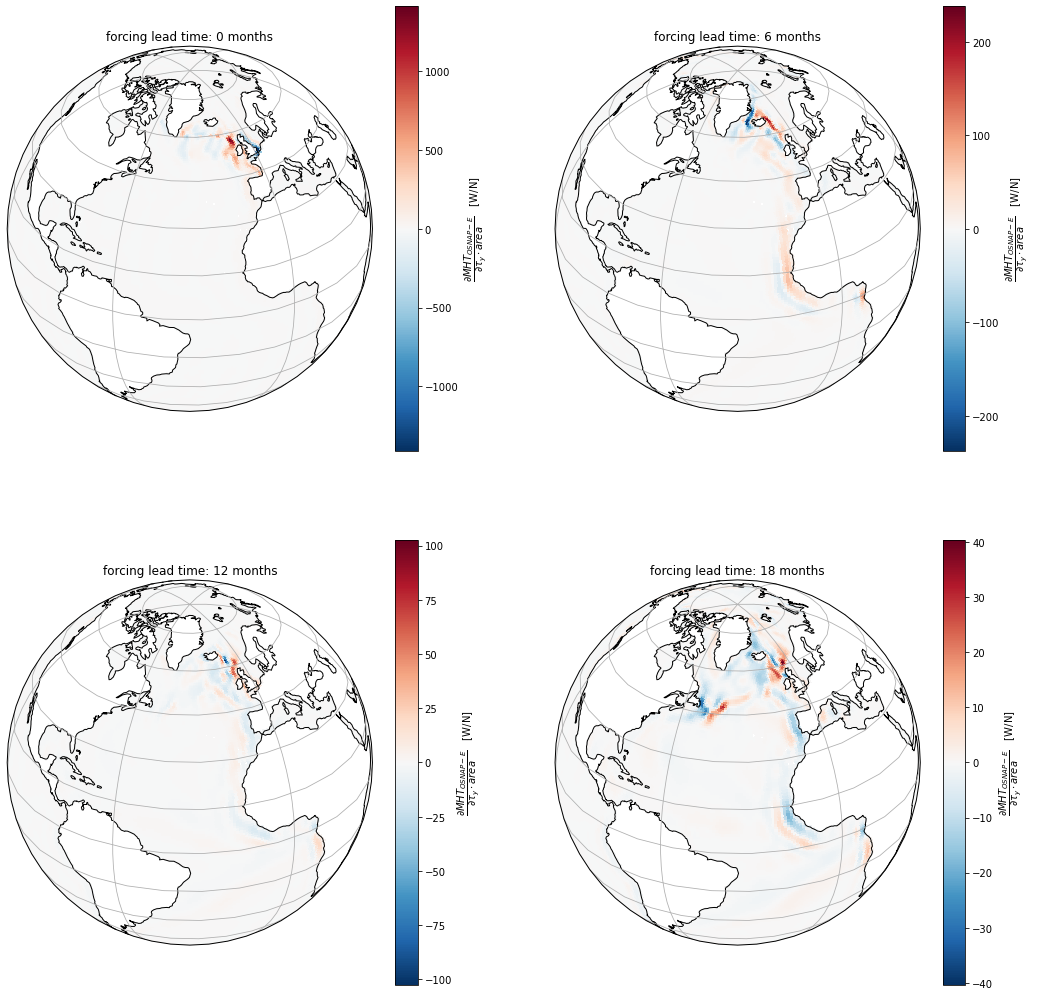

In [6]:
fig,axs = plt.subplots(2,2,figsize=(18,18),
                      subplot_kw={'projection':ccrs.Orthographic(central_longitude=-35,central_latitude=30)})


ds2.heatOSNAPe_adxx_tauy.isel(adj_time=59).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial MHT_{OSNAP-E}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds2['heatOSNAPe_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,0])
                                         
ds2.heatOSNAPe_adxx_tauy.isel(adj_time=53).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial MHT_{OSNAP-E}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds2['heatOSNAPe_adxx_tauy'].units + ']'}, 
                                            ax=axs[0,1])                                         

ds2.heatOSNAPe_adxx_tauy.isel(adj_time=47).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial MHT_{OSNAP-E}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds2['heatOSNAPe_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,0])        

ds2.heatOSNAPe_adxx_tauy.isel(adj_time=41).plot(cmap='RdBu_r', transform=ccrs.PlateCarree(),
                                            cbar_kwargs={"label": r'$\dfrac{\partial MHT_{OSNAP-E}}{\partial \tau_y \cdot area}\quad$'
                                            + '[' + ds2['heatOSNAPe_adxx_tauy'].units + ']'}, 
                                            ax=axs[1,1])    
for ax in axs.flatten():
    ax.coastlines()
    ax.gridlines()

axs[0,0].set_title('forcing lead time: 0 months');
axs[0,1].set_title('forcing lead time: 6 months');
axs[1,0].set_title('forcing lead time: 12 months');
axs[1,1].set_title('forcing lead time: 18 months');
#axs[1].set_title('Sensitivity of March %s to changes in \n meridional wind stress at a lead time of 6 month' %qoi);

These sensitivities indicate how (March) monthly mean OSNAP-East heat transport is altered by changes in monthly mean meridional wind stress at the indicated lead time. The first panel shows the sensitivity to changes in $\tau_y$ in the same month (i.e., March mean). The 4th panel shows the sensitivity to changes in the monthly mean of $\tau_y$ 18 months before (i.e., September mean). Note the changing range of the colorbar. Sensitivities become weaker for increasing lead time.


The 5-year mean sensitivities from above are essentially an accumulated version of the monthly mean sensitivities below.